In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, PowerTransformer, LabelEncoder

df = pd.read_csv("data/dataset capstone.csv")
print(df.head())




  Jenis Kelamin  Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)  \
0     Laki-laki            19               91.6              13.3   
1     Laki-laki            20               77.7               8.5   
2     Laki-laki            10               79.0              10.3   
3     Perempuan             2               50.3               8.3   
4     Perempuan             5               56.4              10.9   

           Stunting             Wasting  
0              Tall  Risk of Overweight  
1           Stunted         Underweight  
2            Normal  Risk of Overweight  
3  Severely Stunted  Risk of Overweight  
4  Severely Stunted  Risk of Overweight  


In [4]:
#melihat statistik deskriptif data
print("Statistika Deskriptif")
print(df.describe())



Statistika Deskriptif
        Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)
count  100000.000000      100000.000000     100000.000000
mean       11.992580          73.132657          9.259256
std         7.199671          11.360846          3.300780
min         0.000000          42.600000          1.000000
25%         6.000000          65.500000          6.900000
50%        12.000000          74.200000          9.200000
75%        18.000000          81.400000         11.700000
max        24.000000          97.600000         17.200000


In [5]:
#melihat informasi dataset
print("Informasi Data")
print(df.info())



Informasi Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB
None


In [6]:
#melihat data duplikat
duplicate = df.duplicated().sum()
print(f"Duplikasi Data: {duplicate}")



Duplikasi Data: 7308


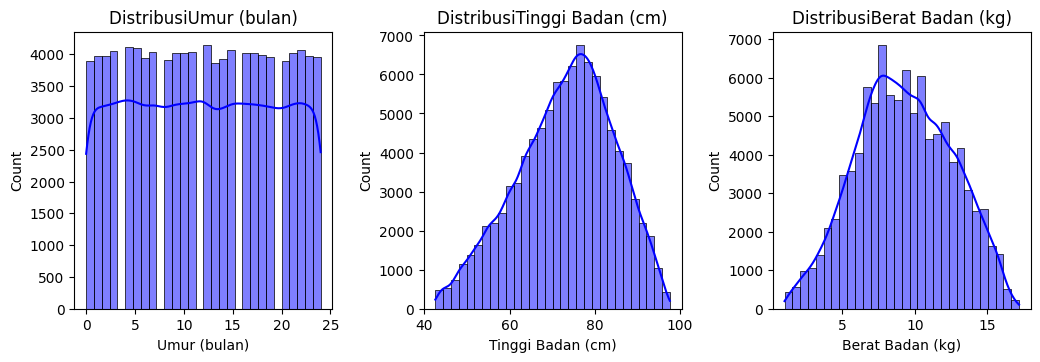

In [7]:
#melihat distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14,10))
for i, column in enumerate(num_features.columns,1):
    plt.subplot(3,4,i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi{column}')
plt.tight_layout()
plt.show()



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3268\777112404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3268\777112404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3268\777112404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')


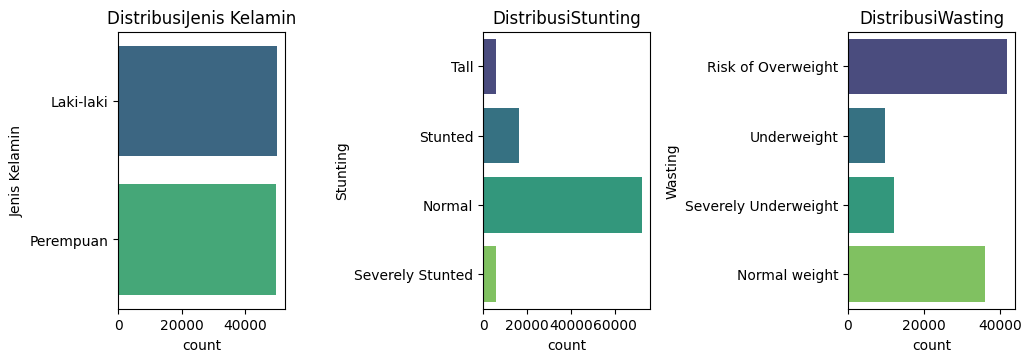

In [8]:
#melihat distribusi fitur kategorikal
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14,10))
for i, column in enumerate(cat_features.columns,1):
    plt.subplot(3,4,i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi{column}')
plt.tight_layout()
plt.show()



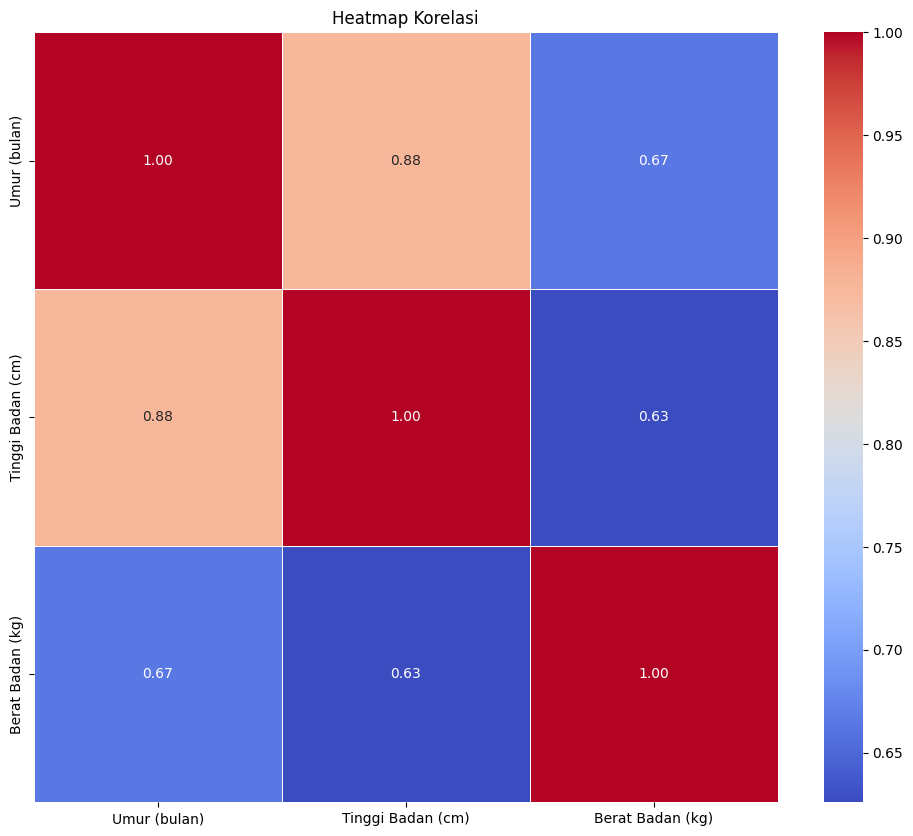

In [9]:
#melihat korelasi antar fitur
plt.figure(figsize=(12,10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

In [10]:
#menghapus data duplikat 
df = df.drop_duplicates()
duplicate = df.duplicated().sum()
print(f'Jumlah data duplikat : {duplicate}')


Jumlah data duplikat : 0


In [11]:
#Mengelompokkan kolom numerik dan kategori
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(numerical_cols)
print(categorical_cols)

['Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)']
['Jenis Kelamin', 'Stunting', 'Wasting']


In [12]:
# Normalisasi Fitur Numerik dengan MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [13]:
# Label Encoding untuk Fitur Kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.to_csv('data/Dataset Final.csv', index = False)
print("CSV berhasil disimpan.")

CSV berhasil disimpan.


In [14]:
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,0,0.791667,0.890909,0.759259,3,1
1,0,0.833333,0.638182,0.462963,2,3
2,0,0.416667,0.661818,0.574074,0,1
3,1,0.083333,0.140000,0.450617,1,1
4,1,0.208333,0.250909,0.611111,1,1


DATA SPLITTING

In [15]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# Pisahkan fitur (X) dan target label (y)
X = df.drop(columns=["Stunting"])  # Semua kolom kecuali Stunting
y = df["Stunting"]  # Label stunting

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek ukuran hasil split
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (74153, 5), Test size: (18539, 5)


In [16]:
#melihat missing value dataset
missing_value = df.isnull().sum()
print("Missing Value")
print(missing_value)



Missing Value
Jenis Kelamin        0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Stunting             0
Wasting              0
dtype: int64


In [17]:
# Gabungkan X dan y agar bisa dibandingkan keseluruhan baris
train_df = X_train.copy()
train_df["Stunting"] = y_train

test_df = X_test.copy()
test_df["Stunting"] = y_test

# Cek duplikat antara train dan test
dupes = pd.merge(train_df, test_df, how="inner")
print(f"Jumlah duplikasi antara train dan test: {len(dupes)}")


Jumlah duplikasi antara train dan test: 0


PEMBANGUNAN MODEL

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
 
print("Model training selesai.")

Model training selesai.


EVALUASI MODEL

In [19]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Evaluasi setiap model dan kumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil evaluasi
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan hasil
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.962134   0.961891  0.962134  0.961964
1            Decision Tree (DT)  1.000000   1.000000  1.000000  1.000000
2            Random Forest (RF)  0.999137   0.999138  0.999137  0.999137
3  Support Vector Machine (SVM)  0.874319   0.894906  0.874319  0.831705
4              Naive Bayes (NB)  0.723394   0.523299  0.723394  0.607289


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KKN, DT, RF overfitting
NB underfitting
paling OK SVM 